## Saturation analyses on the Lx (concordance)
Based on concordance. The concordance calculations are added using 02d-concordance_ad_hoc_Lx

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dir_Lx = '../out/20.0909 Lx/'

In [6]:
def getConcord(x, mod_sfx, dummy_sfx=None):
    # get concordance scores
    if x == 0:
        concord_tr = pd.read_csv('%s/%s/anlyz/concordance/concordance_tr.csv' % (dir_Lx, dummy_sfx))
        concord_te = pd.read_csv('%s/%s/anlyz/concordance/concordance_te.csv' % (dir_Lx, dummy_sfx))
    else:
        concord_tr = pd.read_csv('%s/L%s%s/anlyz/concordance/concordance_tr.csv' % (dir_Lx, x, mod_sfx))
        concord_te = pd.read_csv('%s/L%s%s/anlyz/concordance/concordance_te.csv' % (dir_Lx, x, mod_sfx))
    
    c_mean_tr = concord_tr.concordance.mean()
    c_mean_te = concord_te.concordance.mean()
    c_med_tr = concord_tr.concordance.median()
    c_med_te = concord_te.concordance.median()
                
    return c_mean_tr, c_mean_te, c_med_tr, c_med_te, concord_tr.shape[0]


def getStats(mod_sfx, dummy_sfx):
    df_stats = {'Lx':[], 'c_mean_tr':[], 'c_mean_te':[], 'c_med_tr':[], 'c_med_te':[], 'n_targets':[]}
    for x in Lx_range:
        df_stats['Lx'].append(x)
        c_mean_tr, c_mean_te, c_med_tr, c_med_te, n_targets = getConcord(x, mod_sfx, dummy_sfx)
        df_stats['c_mean_tr'].append(c_mean_tr)
        df_stats['c_mean_te'].append(c_mean_te)
        df_stats['c_med_tr'].append(c_med_tr)
        df_stats['c_med_te'].append(c_med_te)
        df_stats['n_targets'].append(n_targets)
    df_stats = pd.DataFrame(df_stats)
    return df_stats

### LxOnly rf-boruta

In [11]:
Lx_range = [0,25,75,100,200,300]
df_stats = getStats('only_reg_rf_boruta', 'L0only_reg_dummy')
df_stats

,Lx,c_mean_tr,c_mean_te,c_med_tr,c_med_te,n_targets
0,0,0.798334,0.791213,0.827869,0.816092,535
1,25,0.854887,0.800140,0.846311,0.827586,557
2,75,0.866338,0.804387,0.856557,0.821839,546
3,100,0.871614,0.811322,0.860656,0.827586,535
4,200,0.877859,0.820019,0.866803,0.827586,521
5,300,0.879201,0.820529,0.870902,0.827586,500


[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Concordance')]

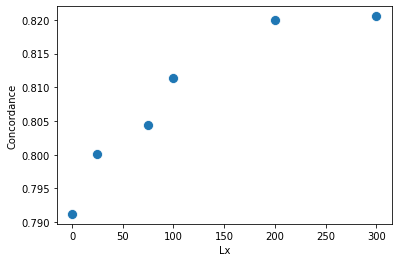

In [12]:
ax = sns.scatterplot(df_stats.Lx, df_stats.c_mean_te, s=100)
ax.set(xlabel='Lx', ylabel='Concordance')

### LxOnly elastic-net genome-wide

In [68]:
Lx_range = [0,25,75,100,200]
df_stats = getStats('only_reg_elasticnet_all', 'L0only_reg_dummy_all')
df_stats

,Lx,c_mean_tr,c_mean_te,c_med_tr,c_med_te,n_targets
0,0,0.973425,0.973026,1.000000,1.000000,18228
1,25,0.873783,0.871291,0.940574,0.942529,1487
2,75,0.895392,0.894161,0.965164,0.965517,2620
3,100,0.898453,0.896884,0.965164,0.965517,2594
4,200,0.900985,0.899749,0.967213,0.965517,2729


[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Concordance')]

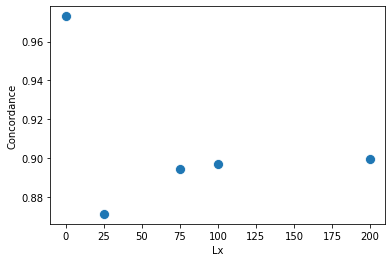

In [69]:
ax = sns.scatterplot(df_stats.Lx, df_stats.c_mean_te, s=100)
ax.set(xlabel='Lx', ylabel='Concordance')

### LxOnly rf-boruta all

In [ ]:
Lx_range = [0, 100, 200]
df_stats = getStats('only_reg_rf_boruta_all', 'L0only_reg_dummy_all')
df_stats

In [ ]:
ax = sns.scatterplot(df_stats.Lx, df_stats.c_mean_te, s=100)
ax.set(xlabel='Lx', ylabel='Concordance')